In [49]:
# This script tests site variance based on the mean functional image by comparing two of the 
# following (sites, tasks, runs). Please define "site1 and site2" and with whichever settings
# is of interest.)

# Runs with extreme motion are filered out (this threshold was determined by 0.4 mm in FDs for 
# over 25% of the trial).

# PCA (a truncated version of SVD) is applied to the matrix of all images. The output is then
# fed into a SVM with a linear kernel for classification. Lastly, the PC1 and PC2 are plotted.

# written by: Rania e. (contact rezzo@bu.edu)

########### SPECIFY WHICH TWO SITES/TASKS TO COMPARE ################
smoothed = 1          # 0 (no aroma) or 1 (aroma)

# site 1 specs
site1 = 'CBT'     # site is ID (e.g. CBT, SCOTTFM, DOD, tasti2, EIB)
task1 = 'morphing'       # task (e.g. sholo, morphing, etc.)
run1 = '001'          # run (e.g. 001 , 002, 003, 004)

# site 2 specs
site2 = 'DOD'
task2 = 'morphing'
run2 = '001'


save_path = "./Site_Variance_Plots/"

#same for all subjects / all sites
mask = "/om/group/saxelab/OpenAutism/Analysis/first_level_gorgolewski.py/CBT/sub-SAXCBTNT04/sholo/model/run1/MNI152NLin2009cAsym_brainmask.nii.gz"
##################################################################

In [50]:
from glob import glob
import re

if smoothed:
    aroma = '_variant-smoothAROMAnonaggr'
    variantpath = "/om/group/saxelab/OpenAutism/Analysis/aroma_bold_reference_images/"
else:
    aroma = ''
    variantpath = '/om/group/saxelab/OpenAutism/Analysis/bold_reference_images/'

# list all of the files in directory /om/group/saxelab/OpenAutism/Analysis/bold_reference_images
all_files = glob(variantpath+"*")
subject = []
count_1 = 0
count_2 = 0

# create list of subject in folder
for runs in range(0, len(all_files)):
    SITE1 = re.search('mean_sub-SAX'+site1+'(.+?)_task-'+task1+'_run-'+run1+'_bold_space-MNI152NLin2009cAsym'+aroma+'_preproc.nii.gz', all_files[runs])
    SITE2 = re.search('mean_sub-SAX'+site2+'(.+?)_task-'+task2+'_run-'+run2+'_bold_space-MNI152NLin2009cAsym'+aroma+'_preproc.nii.gz', all_files[runs])
    if SITE1:
        found = SITE1.group(1)
        if 'SAX'+site1+found+task1+run1 in open('Runs_MotionFiltered.csv').read():
            #if found in ['02','06','07','17','37']: #added
            #    print("REPEAT "+found)
            #    continue 
            #else:
            found = 'mean_sub-SAX'+site1+found+'_task-'+task1+'_run-'+run1+'_bold_space-MNI152NLin2009cAsym'+aroma+'_preproc.nii.gz'
            subject.append(found)
            count_1 = count_1 + 1
        else:
            print('EXCLUDE_'+site1+'_'+found)
    if SITE2:
        found = SITE2.group(1)
        if 'SAX'+site2+found+task2+run2 in open('Runs_MotionFiltered.csv').read():
            found = 'mean_sub-SAX'+site2+found+'_task-'+task2+'_run-'+run2+'_bold_space-MNI152NLin2009cAsym'+aroma+'_preproc.nii.gz'
            subject.append(found)
            count_2 = count_2 + 1
        else:
            print('EXCLUDE_'+site2+'_'+found)
subject.sort()
print(subject)

print('Total= '+str(len(subject)))
print(site1 + " = " +str(count_1))
print(site2 + " = " +str(count_2))


EXCLUDE_CBT_ASD02
EXCLUDE_DOD_007
['mean_sub-SAXCBTASD03_task-morphing_run-001_bold_space-MNI152NLin2009cAsym_variant-smoothAROMAnonaggr_preproc.nii.gz', 'mean_sub-SAXCBTNT01_task-morphing_run-001_bold_space-MNI152NLin2009cAsym_variant-smoothAROMAnonaggr_preproc.nii.gz', 'mean_sub-SAXCBTNT02_task-morphing_run-001_bold_space-MNI152NLin2009cAsym_variant-smoothAROMAnonaggr_preproc.nii.gz', 'mean_sub-SAXCBTNT04_task-morphing_run-001_bold_space-MNI152NLin2009cAsym_variant-smoothAROMAnonaggr_preproc.nii.gz', 'mean_sub-SAXCBTNT05_task-morphing_run-001_bold_space-MNI152NLin2009cAsym_variant-smoothAROMAnonaggr_preproc.nii.gz', 'mean_sub-SAXCBTNT07_task-morphing_run-001_bold_space-MNI152NLin2009cAsym_variant-smoothAROMAnonaggr_preproc.nii.gz', 'mean_sub-SAXCBTNT08_task-morphing_run-001_bold_space-MNI152NLin2009cAsym_variant-smoothAROMAnonaggr_preproc.nii.gz', 'mean_sub-SAXCBTNT10_task-morphing_run-001_bold_space-MNI152NLin2009cAsym_variant-smoothAROMAnonaggr_preproc.nii.gz', 'mean_sub-SAXCBTNT11

In [51]:
import os
import nibabel as nib
import numpy as np
from matplotlib.mlab import PCA


#result_array = np.array([])
result_array = np.empty((len(subject)-1,902629,)) #columns rows (MUST FIX TO THE SHAPE I NEED)--275275;325325
result_array[:] = np.nan
print(result_array.size)
largest_array = 0

for elements in range(0, (len(subject)-1)):

    #subj_ex = os.path.join('/om/group/saxelab/OpenAutism/Analysis/bold_reference_images/'+subject[elements])
    subj_ex = os.path.join(variantpath+subject[elements])
    
    Subject = nib.load(subj_ex)
    Subject_data = np.array(Subject.dataobj)
    #print(Subject_data.shape)
    
    Mask = nib.load(mask)
    Mask_data = np.array(Mask.dataobj)   
    
    Subject_data = Subject_data*Mask_data # added
    
    flat_subject = Subject_data.flatten()
    #print(flat_subject[1])
    #print(flat_subject.shape) 
    result_array[elements,:] = flat_subject
    
    if flat_subject.size > largest_array:
        largest_array = flat_subject.size       

print(result_array.shape)
print("Matrix = " + str(largest_array) + "x" + str(len(subject)))


47839337
(53, 902629)
Matrix = 902629x54


In [37]:
print(Subject_data.shape)

(91, 109, 91)


In [23]:
# SANITY CHECK

# check if all are zeros (should be FALSE)
all_zeros = not np.any(result_array)
print(all_zeros)

# check for nans (there should be none)
np.isnan(result_array).sum()

False


0

In [52]:
# taken from: https://gist.github.com/addisonhuddy/8a9e682259c9dca1f61672b4027863dc
# for help: https://stats.stackexchange.com/questions/96482/understanding-the-output-of-svd-when-used-for-pca
from sklearn.decomposition import TruncatedSVD #maybe use this instead?

# mean center the data (mixed opinions about this-mean centering seems dominant view)
a = result_array
to_norm = np.mean(a, axis=0) #uncommented
final = a - to_norm #uncommented

U, s, VT = np.linalg.svd(final, full_matrices=False) #changed to final
U2, s2, VT2 = np.linalg.svd(a, full_matrices=False) #changed to final

In [53]:
# help: http://blog.explainmydata.com/2016/01/how-much-faster-is-truncated-svd.html
# as MURCIA et al did

All_Component_scores = U*s    #col by col

In [54]:
# THIS IS OUTPUT OF PCA AT ALL IMAGES

# make sure having negative values is ok.

print(VT.shape) # (81, 325325) columns of these are the PC scores (similar to eigenimages). (Also sometimes called PC)
print(s.shape) # (81) singular values (sqrt of eigenvalues of covariance matrix) 
print(U.shape) # (81, 81) Princpal Components : component loadings (sometimes called PC)

# we care about VT for classification: https://books.google.com/books?id=khpYDgAAQBAJ&pg=PA215&lpg=PA215&dq=do+we+care+about+U+or+VT+in+the+np.linalg.svd&source=bl&ots=kLBvKPCppZ&sig=qElbYgnk4HTM2OlY485ECi-XCIE&hl=en&sa=X&ved=0ahUKEwjn7Jm6k7DaAhUW24MKHf0QBfAQ6AEISjAF#v=onepage&q=do%20we%20care%20about%20U%20or%20VT%20in%20the%20np.linalg.svd&f=false
# pg. 215
test1 = U[:,1]
print(test1)

PC1 = VT[:,0]
print(PC1)  # first PC score?    
# PC1 = All_Component_scores[:,0]
# print(PC1)  # first PC score?

PC2 = VT[:,1]
print(PC2)  # second PC score?
# PC2 = All_Component_scores[:,1]
# print(PC2)  # second PC score?





(53, 902629)
(53,)
(53, 53)
[ 0.06557421 -0.1470319  -0.00308882  0.01360533  0.12077252 -0.14564255
 -0.04373703 -0.03623645 -0.06245271  0.13079893  0.16354462  0.22165507
  0.21576475  0.08028788 -0.15588874  0.05284826 -0.01641042 -0.01538905
 -0.20277471 -0.04238265  0.03938872 -0.02540184 -0.0916946  -0.00683126
 -0.01751225 -0.16026963 -0.04999243 -0.21432455  0.05392822  0.08863696
  0.10703986  0.03888262  0.26082119 -0.19098752  0.27294115  0.24205963
  0.05447099 -0.40957223 -0.03526895  0.04284125 -0.05926837 -0.05889543
 -0.02457773 -0.04401436  0.00127223 -0.0991597   0.28194651 -0.12713915
  0.05422226  0.20157838 -0.12471322 -0.1221708  -0.07205248]
[ 2.69448950e-16 -8.03681359e-17 -5.25149434e-16 -8.02857033e-16
 -7.26899066e-16  1.25966121e-15 -1.38585972e-15  9.22308476e-18
  1.43472935e-15 -8.42565970e-16  1.96060230e-15 -1.18618623e-15
 -1.73435774e-15 -5.22638706e-16  2.26301408e-15  3.45520110e-15
 -1.48818224e-15  1.95408393e-15 -1.77534115e-15  4.01600391e-16
 

In [55]:
# !!!!!!!!!!! save VT[0,:] as nifti file to see if I can reconstruct image::

from nibabel.testing import data_path

temp = VT[0,:]
temp2 = np.array(temp)
print(temp2.shape)

Eigenimage = np.reshape(temp2, (91,109,91))

print(Eigenimage.shape)
Eigenimage[1,1,1]

# now save as nifti image


#dummy file

## where ROIs are located
root = '/om/group/saxelab/OpenAutism/Analysis/ROIs/'
parcel_file = os.path.join(data_path, root + 'rSTS_FSL_space.nii.gz')

PARCEL = nib.load(parcel_file)

#save x as a nifti file
img_example = nib.Nifti1Image(Eigenimage, PARCEL.affine, PARCEL.header)
nib.save(img_example, save_path+site1+task1+run1+"_VS_"+site2+task2+run2+'_Eigenimage_PC1.nii.gz')



(902629,)
(91, 109, 91)


In [56]:
# preparation for training & test data

from sklearn import svm
import random

attribute = []
class_score = []
class_std = []

#select number to leave out of test set (10%) 
exclude = np.round((min(count_1, count_2))*0.9,0) #int(len(subject)/10)
print(exclude)

# attibute 1 is site2, 0 is site1
for element in range(0, len(subject)-1):
    #print(subject[element])
    SITE1 = re.search('mean_sub-SAX'+site1+'(.+?)_task-'+task1+'_run-'+run1, subject[element])
    if SITE1:
        attribute.append(0)
    else:
        attribute.append(1)

Site1 = []
Site2 = []

# to make sure equal number represented from each class
for index, value in enumerate(attribute):
    if value > 0:
        Site1.append(index)
    elif value == 0:
        Site2.append(index)
        

for elements in range (0, int(exclude-1)):        
        
    # create test_index        
    train_index = random.sample(Site1,int(exclude/2)) + random.sample(Site2,int(exclude/2)) # the train set        
    #train_index = Site1[:int(exclude/2)] + Site2[:int(exclude/2)] # the train set # old

    # remove all elements from test_index that are in the train_index
    test_index = list(range(0, (len(subject)-1)))
    test_index = [x for x in test_index if x not in train_index]

    # now make final arrays for SVM
    print(train_index)
    print(test_index)

    # This is PC 1
    train_category = []
    test_category = []
    train_array = All_Component_scores   # result array of final?
    test_array = All_Component_scores 

    print('check')
    print(final.shape)

    for index, value in enumerate(train_index):
        #train_category.append(attribute[value])   ## removed to test
        train_category.append(attribute[value])
    train_array = train_array[train_index,0:(len(subject))] # use len subjects as # features to train model

    for index, value in enumerate(test_index):
        #test_category.append(attribute[value])    ## removed to test
        test_category.append(attribute[value])
    test_array = test_array[test_index,0:(len(subject))]

    #print(train_array.shape)  
    #print(test_array.shape) 
    #print(train_category)
    #print(test_category)
    #print(subject)

    # need to prepare x = [n_samples, n_features] ... & ...  y = [n_samples]
        # y == train_category or test_category
        # x = train_array or test_array

    #############################################

    # parts taken from: https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/ 
    from sklearn import svm    

    #Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
    # Create SVM classification object 
    model = svm.SVC(kernel='linear', C=1) #C=1E10)

    # there is various option associated with it, like changing kernel, gamma and C value. 
    # Train the model using the training sets and check score
    model.fit(train_array, train_category)

    print(test_array.shape)
    print(len(test_category))

    print(model.score(test_array, test_category))

    #Predict Output
    predicted= model.predict(test_array)
    print(predicted)
    print(test_category)
    #score(X, y[, sample_weight])

    #make sure this is correct:
    count = 0
    for i in range(len(predicted)): # assuming the lists are of the same length
        if predicted[i]==test_category[i]:
            count = count+1
    score = count/len(predicted)
    print('Classification Accuracy = '+str(score))
    print(len(predicted))

    # W=svm.SVC.coef_[0] # weights
    # I=svm.SVC.intercept # intercept
    # a = -W[0]/W[1]
    # b = I[0]/W[1]
    # x = [-2.5, -2, -1.5, -1, -0.5, 0, -.5, 1, 1.5, 2, 2.5]
    # y = a*x - b
    
    class_score.append(score)

print(class_score)    
stdd = np.std(class_score)
print(stdd)
    
print("Classifier is about "+str(np.mean(class_score))+"% correct")
print("Classifier error is about "+str(stdd))

22.0
[41, 33, 46, 52, 51, 44, 30, 34, 43, 32, 37, 5, 7, 17, 26, 9, 12, 8, 11, 4, 15, 13]
[0, 1, 2, 3, 6, 10, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31, 35, 36, 38, 39, 40, 42, 45, 47, 48, 49, 50]
check
(53, 902629)
(31, 53)
31
0.45161290322580644
[0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Classification Accuracy = 0.45161290322580644
31
[39, 41, 49, 42, 40, 32, 46, 30, 38, 50, 43, 18, 1, 5, 20, 24, 6, 16, 28, 21, 17, 9]
[0, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15, 19, 22, 23, 25, 26, 27, 29, 31, 33, 34, 35, 36, 37, 44, 45, 47, 48, 51, 52]
check
(53, 902629)
(31, 53)
31
0.6451612903225806
[1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Classification Accuracy = 0.6451612903225806
31
[47, 48, 39, 44, 50, 36, 45, 30, 41, 42, 40, 1, 10, 3, 24, 6, 8, 16, 21, 

In [57]:
print("Classifier is about "+str(np.mean(class_score))+"% correct")
print("Classifier error is about "+str(stdd))

Classifier is about 0.5898617511520737% correct
Classifier error is about 0.06762322796637524


53
22
[37, 31, 45, 47, 35, 48, 39, 42, 43, 49, 33, 13, 17, 0, 23, 5, 25, 7, 6, 27, 22, 8]
[1, 2, 3, 4, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 24, 26, 28, 29, 30, 32, 34, 36, 38, 40, 41, 44, 46, 50, 51, 52]
1


/opt/conda/envs/neuro/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


<IPython.core.display.Javascript object>


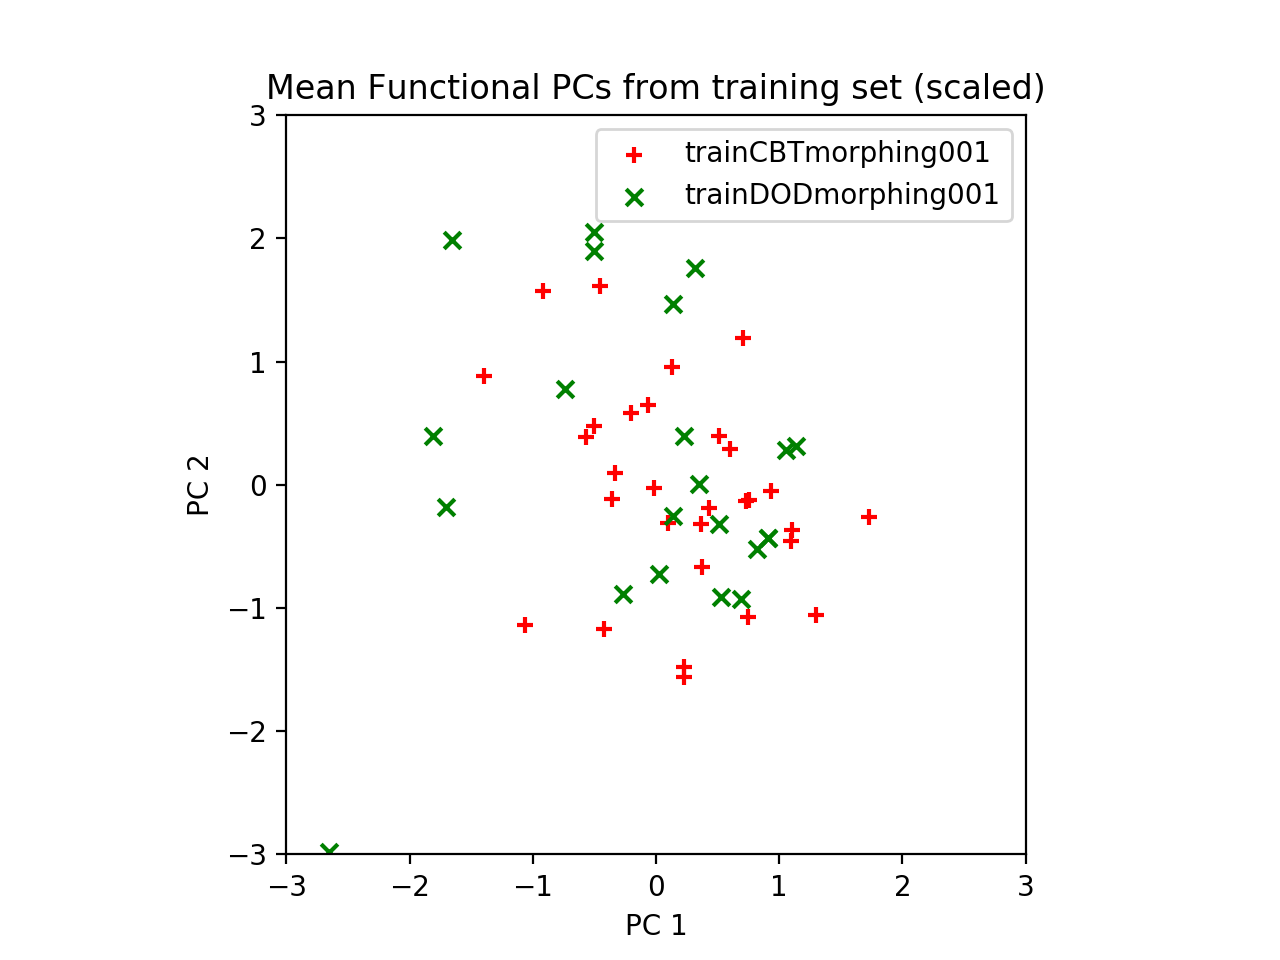

2
3
4
9
10
11
12
14
15
16
18
19
20
21
24
26
28
29
30
32
34
36
38
40
41
44
46
50
51
52
37
31
45
47
35
48
39
42
43
49
33
13
17
0
23
5
25
7
6
27
22
8


/opt/conda/envs/neuro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [58]:
%matplotlib notebook
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import cross_validation


import pylab as pl
from sklearn.preprocessing import scale

#scale component scores
X = scale( All_Component_scores, axis=0, with_mean=True, with_std=True, copy=True )

pca_2d = X[:,0:len(subject)-1]
print(pca_2d.shape[0])
print(len(train_category))

print(train_index)
print(test_index)
counter = 0

# indexing is wrong here!
for i in range(0, len(test_index)):
    temp = test_index[i]
    print(temp)
    counter = counter+1
    if test_category[i] == 0:
        c1 = pl.scatter(pca_2d[temp,0],pca_2d[temp,1],c='r',marker='+')
    elif test_category[i] == 1:
        c2 = pl.scatter(pca_2d[temp,0],pca_2d[temp,1],c='g',marker='x')
for i in range(0, len(train_index)):
    temp = train_index[i]
    print(temp)
    counter = counter+1
    if train_category[i] == 0:
        c1 = pl.scatter(pca_2d[temp,0],pca_2d[temp,1],c='r',marker='+')
    elif train_category[i] == 1:
        c2 = pl.scatter(pca_2d[temp,0],pca_2d[temp,1],c='g',marker='x')

              
pl.legend([c1, c2], ['train'+site1+task1+run1, 'train'+site2+task2+run2])
pl.title('Mean Functional PCs from training set (scaled)')
pl.ylim(-3, 3)
pl.xlim(-3, 3)
pl.xlabel('PC 1')
pl.ylabel('PC 2')
pl.axes().set_aspect('equal')
#############
# x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
# y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))
# Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
# Z = Z.reshape(xx.shape)
# pl.contour(xx, yy, Z)
# pl.title('Support Vector Machine Decision Surface')
# pl.axis('off')

pl.show()

pl.savefig(save_path+site1+task1+run1+"_VS_"+site2+task2+run2+'Variance_Dis.png')

#print(counter)

(23,)
(30,)
0.5002225503624841
0.7590795990452647
-1.6049391879350456
-0.6152015052726097
-0.10976912623800163
0.08415633011580131


<IPython.core.display.Javascript object>


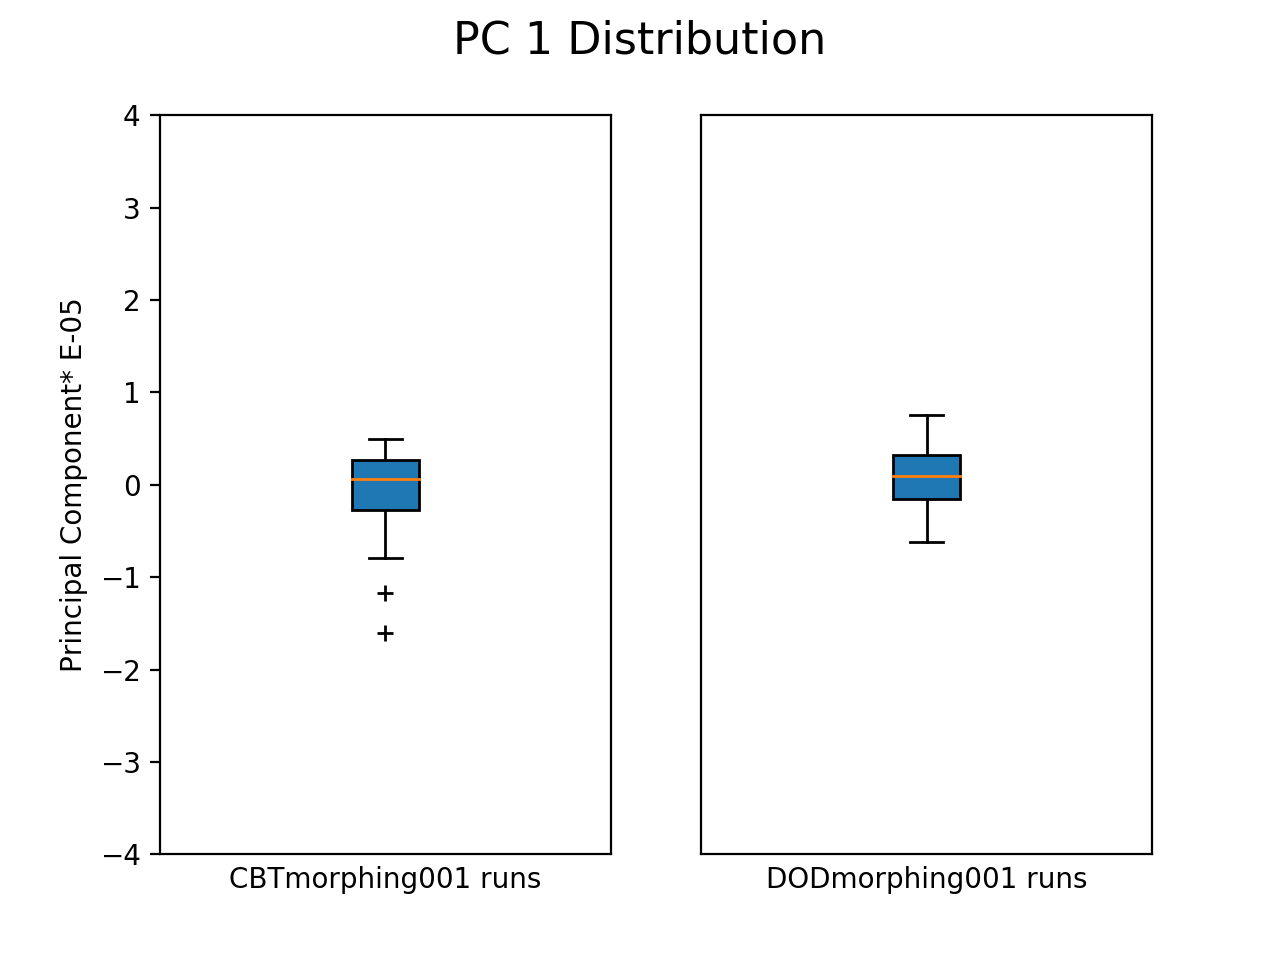

./Site_Variance_Plots/CBTmorphing001_VS_DODmorphing001PC1_Boxplot.png


In [59]:
# boxplot PER SITE
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
%matplotlib notebook

Site1_1 =All_Component_scores[Site1,0]/100000
Site2_1 =All_Component_scores[Site2,0]/100000
print(Site1_1.shape)
print(Site2_1.shape)
print(np.max(Site1_1))
print(np.max(Site2_1))
print(np.min(Site1_1))
print(np.min(Site2_1))
print(np.mean(Site1_1))
print(np.mean(Site2_1))

fig, axs = plt.subplots(1, 2)

# basic plot
axs[0].boxplot(Site1_1, notch=False, sym='+',vert=True, whis=1.5,
        positions=None, widths=None, patch_artist=True,
        bootstrap=None, usermedians=None, conf_intervals=None)
axs[0].axes.set_ylim(-4,4)
axs[0].axes.set_xlabel(site1+task1+run1+' runs')
axs[0].axes.set_ylabel('Principal Component* E-05')
axs[0].axes.get_xaxis().set_ticks([])

# notched plot
axs[1].boxplot(Site2_1, notch=False, sym='+',vert=True, whis=1.5,
        positions=None, widths=None, patch_artist=True,
        bootstrap=None, usermedians=None, conf_intervals=None)
axs[1].axes.set_ylim(-4,4)
axs[1].axes.set_xlabel(site2+task2+run2+' runs')
axs[1].axes.get_xaxis().set_ticks([])
axs[1].axes.get_yaxis().set_ticks([])

plt.suptitle('PC 1 Distribution', fontsize=16)
plt.show()
pl.savefig(save_path+site1+task1+run1+"_VS_"+site2+task2+run2+'PC1_Boxplot.png')
print(save_path+site1+task1+run1+"_VS_"+site2+task2+run2+'PC1_Boxplot.png')

<IPython.core.display.Javascript object>


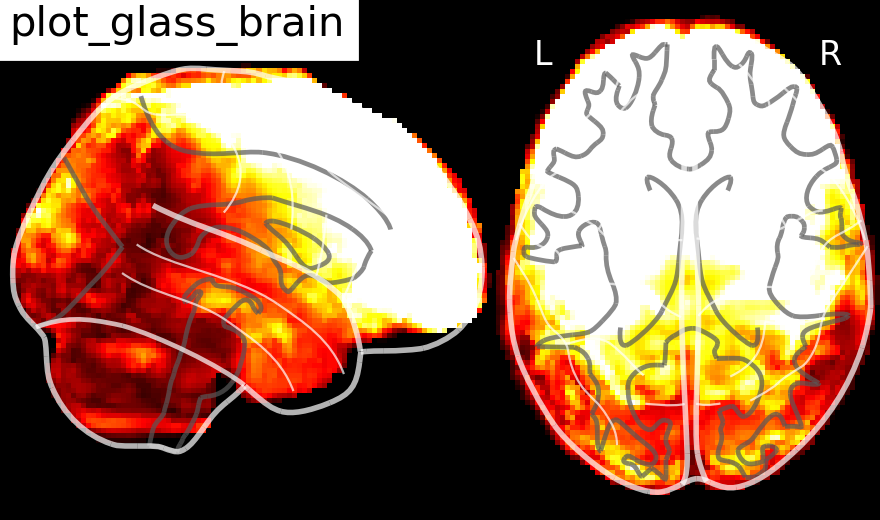

/om/user/rezzo/Site_Variance_Plots/CBTmorphing001_VS_DODmorphing001_Eigenimage_PC1.png


In [60]:
## to plot the nifti image

#site1= 'tasti2' 
#task1= 'biomo'
#run1= '001'
#site2 = 'DOD'
#task2= 'morphing'
#run2= '001'

save_path2 = '/om/user/rezzo/Site_Variance_Plots/'

from nibabel.testing import data_path
from nilearn import plotting

# use temporarily
root = '/om/group/saxelab/OpenAutism/Analysis/ROIs/'
parcel_file = os.path.join(data_path, root + 'rSTS_FSL_space.nii.gz')
PARCEL = nib.load(parcel_file)

# load in a nifti file and see if it works.
#temp_path = './Site_Variance_Plots/CBTsholo001_VS_DODmorphing001_Eigenimage_PC1.nii.gz' # use temp_path
temp_path = save_path2+site1+task1+run1+'_VS_'+site2+task2+run2+'_Eigenimage_PC1.nii.gz'

#plotting.plot_glass_brain(img, threshold=0.0001)
display = plotting.plot_glass_brain(temp_path, title='plot_glass_brain',
                          black_bg=True, display_mode='xz', threshold=0.000001)
#plotting.plot_connectome(img)

plotting.show()
  
#display.savefig(save_path2+site1+task1+run1+'_Eigenimage_PC1.png')
#plotting.plot_stat_map(IMG, output_file=save_path2+site1+task1+run1+'_Eigenimage_PC1.png') 
   
display.savefig(save_path2+site1+task1+run1+'_VS_'+site2+task2+run2+'_Eigenimage_PC1.png')
print(save_path2+site1+task1+run1+'_VS_'+site2+task2+run2+'_Eigenimage_PC1.png')